# 통계적 추정

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston

boston_houseprice_data = load_boston()

df = pd.DataFrame(
    data = boston_houseprice_data.data, 
    columns = boston_houseprice_data.feature_names
)
rooms = np.array(df['RM'])

In [ ]:
p_mean = np.mean(rooms)
p_var = np.var(rooms)

p_mean, p_var

(6.285, 0.493)

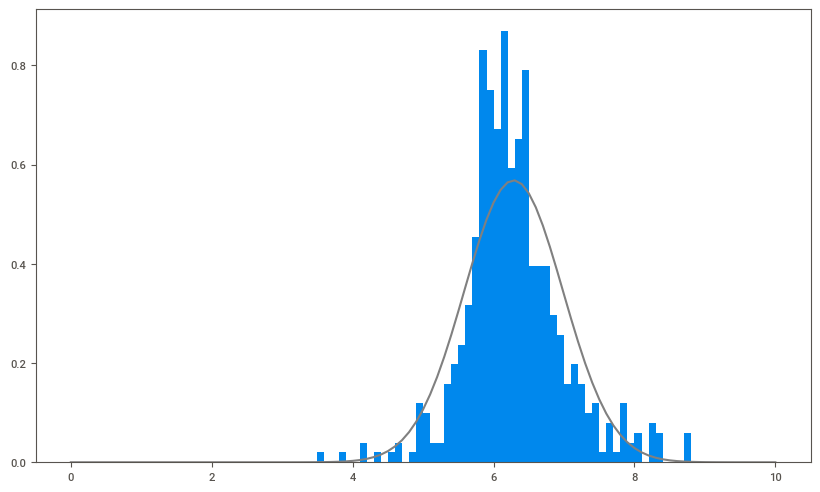

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.arange(101)/10
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(rooms, bins=100, range=(0, 10), density=True)

plt.show()

In [ ]:
np.random.seed(0)
n = 20
sample = np.random.choice(rooms, n)
sample

array([5.572, 6.03 , 6.021, 7.178, 5.708, 6.438, 7.875, 6.112, 6.004,
       5.404, 6.826, 6.358, 6.63 , 6.121, 6.417, 6.437, 7.007, 6.405,
       6.567, 6.8  ])

In [ ]:
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(rooms, (n_samples, n))

## 점추정

### 모평균의 점추정

In [ ]:
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean:.3f}')

1번째 표본평균: 6.167
2번째 표본평균: 6.224
3번째 표본평균: 6.510
4번째 표본평균: 6.328
5번째 표본평균: 6.491


In [ ]:
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

6.284

In [ ]:
np.mean(np.random.choice(rooms, int(1e6)))

6.285

In [ ]:
s_mean = np.mean(sample)
s_mean

6.396

### 모분산의 점추정

In [ ]:
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 0.874
2번째 표본분산: 0.521
3번째 표본분산: 0.322
4번째 표본분산: 0.221
5번째 표본분산: 0.419


In [ ]:
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)

0.467

In [ ]:
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

0.491

In [ ]:
np.var(np.random.choice(rooms, int(1e6)), ddof=1)

0.493

In [ ]:
u_var = np.var(sample, ddof=1)
u_var

0.333

## 구간추정

### 정규분포의 모평균(분산을 알고 있는)의 구간추정

In [ ]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl

(6.088, 6.703)

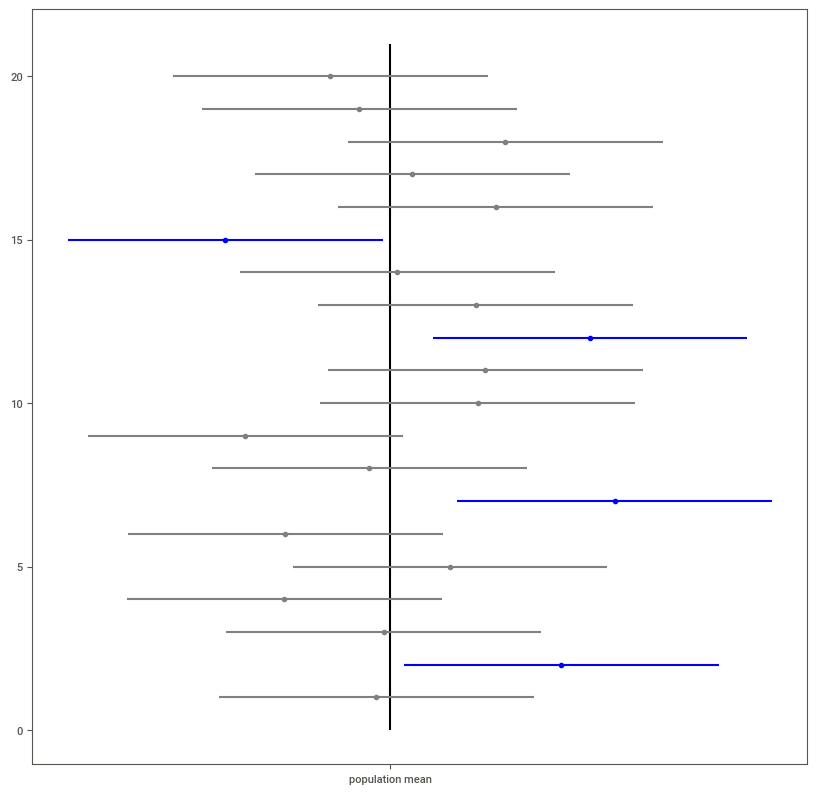

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])

plt.show()

In [ ]:
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1
cnt / len(samples)

0.947

### 정규분포의 모분산(평균을 알지 못하는) 구간추정

In [ ]:
sample_y = sample_u_vars * (n-1) / p_var
sample_y

array([35.474, 21.152, 13.053, ..., 17.608, 24.126,  9.3  ])

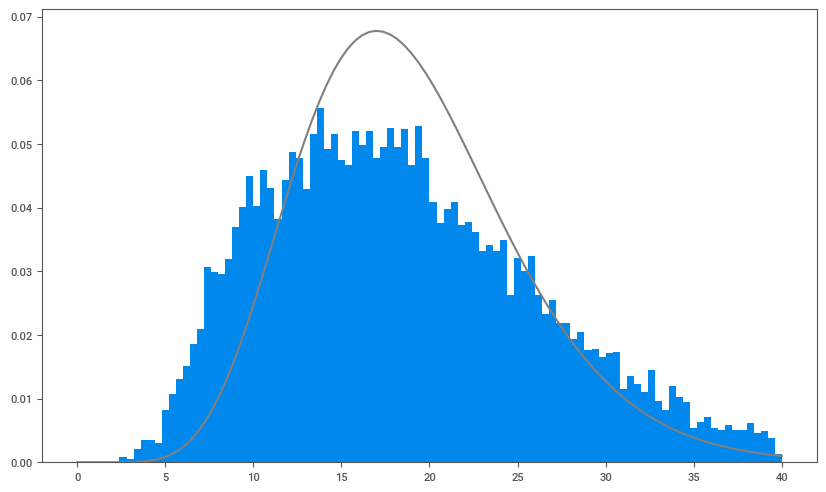

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv = stats.chi2(df=n-1)
ax.plot(xs, rv.pdf(xs), color='gray')
hist, _, _ = ax.hist(sample_y, bins=100,
                     range=(0, 40), density=True)

plt.show()

In [ ]:
rv = stats.chi2(df=n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
hcl = (n-1) * u_var / rv.isf(0.975)

lcl, hcl

(0.193, 0.711)

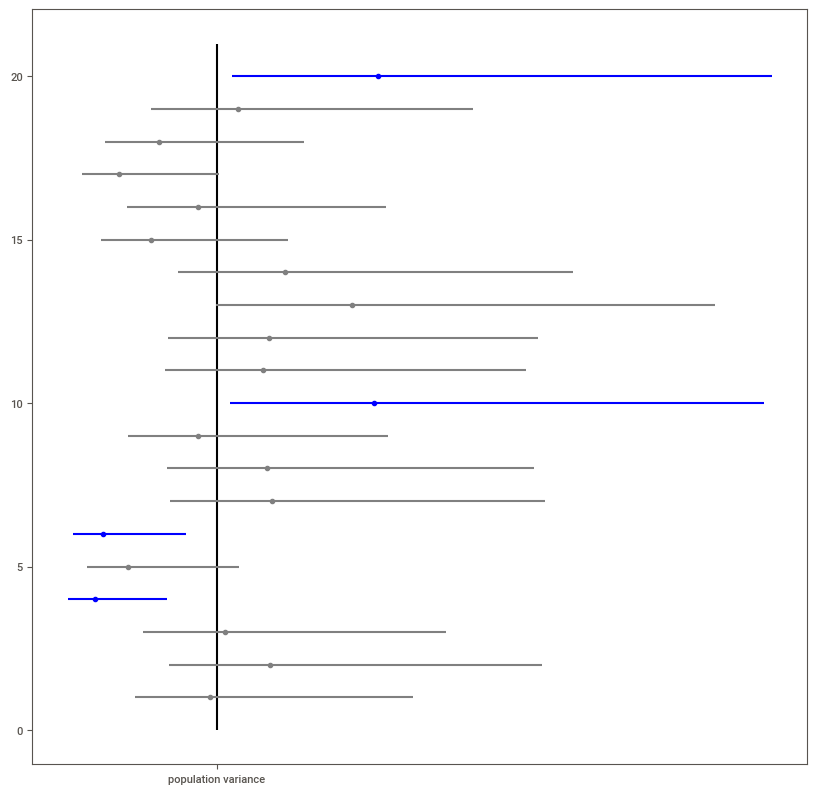

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
ax.set_xticks([p_var])
ax.set_xticklabels(['population variance'])

plt.show()

In [ ]:
rv = stats.chi2(df=n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt += 1
        
cnt / len(samples)

0.845

### 정규분포의 모평균(모분산을 알지 못하는) 구간추정

In [ ]:
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

lcl, ucl

(6.125, 6.666)